<h1>總整理

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
np.__version__,pd.__version__

('1.17.4', '0.25.3')

In [3]:
# pd.set_option("display.max_rows",None)
# pd.set_option("display.max_columns",None)

##### 讀取資料

In [4]:
# 家
# prev_data = pd.read_csv('previous_application.csv')
# POS_data = pd.read_csv('POS_CASH_balance.csv')
# 學校
prev_data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\previous_application.csv')
POS_data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\POS_CASH_balance.csv')
# 組長
# prev_data = pd.read_csv('../../datasets/homecdt_eda/previous_application.csv')
# POS_data = pd.read_csv('../../datasets/homecdt_eda/POS_CASH_balance.csv')


In [5]:
prev_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [6]:
POS_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


#### 定義函數

In [7]:
# 空值
def is_null(df):
    miss_value_percent = df.isnull().sum().sort_values(ascending=False)/len(df)
    miss_value_percent = (miss_value_percent * 100).round(decimals=2)

    miss_value_count = df.isnull().sum().sort_values(ascending=False)
    miss_value =pd.DataFrame( {'count':miss_value_count ,'precent': miss_value_percent} )

    print("空值共有 " + str(miss_value_count[miss_value_count>0].count()) + " 個欄位")
    print(miss_value[miss_value_count>0])
    
# 資料型態
def Type(df):
    return pd.DataFrame(df.dtypes).reset_index()

# 分類是空值與零的數
def check_na(df):
    
    data_float64 = list(df.columns[df.dtypes=="float64"])
    data_float64_count = len(data_float64)
    aa = pd.DataFrame()
    for name in data_float64:
        data_is_na = df[df[name].isnull()].count()[0]
        data_is_0 = df[df[name]==0].count()[0]
        pad = pd.DataFrame({"Na":data_is_na,"0":data_is_0},index=[name])
        aa = pd.concat([aa,pad],axis=0)
    return aa


# Prev時間異常值，另外新增欄位
issue_data = list(prev_data.columns[31:-1])
for name in issue_data:    
#     rename = name + "_ANOM"
#     data[rename] = data[name] == 365243
    prev_data[name].replace({365243: np.nan}, inplace = True)


# Prev將缺失值大於60的欄位去除
miss_value_percent = prev_data.isnull().sum().sort_values(ascending=False)/len(prev_data)
miss_value_percent = (miss_value_percent * 100).round(decimals=2)

if (miss_value_percent>60).any():
    delect_colomns = list(miss_value_percent[miss_value_percent>60].index)
    for n in delect_colomns:
        prev_data = prev_data.drop(columns=n)
        
# AMT_CREDIT空值只有一個直接補0
prev_data['AMT_CREDIT'].replace({np.nan: 0}, inplace = True)


In [8]:
is_null(prev_data)

空值共有 12 個欄位
                            count  precent
DAYS_TERMINATION           898978    53.82
RATE_DOWN_PAYMENT          895844    53.64
AMT_DOWN_PAYMENT           895844    53.64
DAYS_LAST_DUE              884286    52.94
NAME_TYPE_SUITE            820405    49.12
DAYS_LAST_DUE_1ST_VERSION  766929    45.92
DAYS_FIRST_DUE             713710    42.73
NFLAG_INSURED_ON_APPROVAL  673065    40.30
AMT_GOODS_PRICE            385515    23.08
AMT_ANNUITY                372235    22.29
CNT_PAYMENT                372230    22.29
PRODUCT_COMBINATION           346     0.02


In [9]:
is_null(POS_data)

空值共有 2 個欄位
                       count  precent
CNT_INSTALMENT_FUTURE  26087     0.26
CNT_INSTALMENT         26071     0.26


### 特徵工程
---
POS_data
  
   * 新增特徵欄位Delay_rate  --> 遲繳比例 (ex 若有四期 其有一期遲繳超過一天的話就是1/4)
   * 新增特徵欄位Contract_Change --> 提早繳完 且 不在目前進行中的貸款
   * 新增特徵欄位Total_Months --> 總還款期數
   

In [10]:
# 2020-01-16

# Total_Months --> 總還款期數
# MONTHS_BALANCE_start --> 貸款開始時間
# MONTHS_BALANCE_finish --> 貸款結束時間
# CNT_INSTALMENT_max --> 最大申請期數(擬定合約期數)
# CNT_INSTALMENT_min --> 最小申請期數(中間改合約)
# CNT_INSTALMENT_median --> 申請期數中位數
# Delay_Rate --> 遲繳比例(ex 共四期 有一期遲繳就是1/4)
# SK_DPD_max --> 貸款愈期最大天數
# SK_DPD_mean --> 貸款逾期平均數
# Contract_Change -- > 提早繳完 且 不在目前進行中的貸款
# Contract_Change_count --> 合約縮短了多少期
# CNT_INSTALMENT/Total_Months_rate --> 申請期數與總還款期數比例
# Contract_Change_rate(CNT_INSTALMENT) --> 縮短了多少期除以申請期數
# Contract_Change_rate(Total_Months) --> 縮短了多少期除以總還款期數

# 將有特殊狀態的欄位新增 (onehot)
categorical_columns = []
for name in POS_data:
    if POS_data[name].dtype=='object':
        categorical_columns.append(name)
POS_data = pd.get_dummies(POS_data, columns = categorical_columns)

POS_data.rename(columns={'NAME_CONTRACT_STATUS_Active':'Active',
                     'NAME_CONTRACT_STATUS_Amortized debt':'Amortized debt',
                    'NAME_CONTRACT_STATUS_Approved':'Approved',
                    'NAME_CONTRACT_STATUS_Canceled':'Canceled',
                    'NAME_CONTRACT_STATUS_Completed':'Completed',
                    'NAME_CONTRACT_STATUS_Demand':'Demand',
                    'NAME_CONTRACT_STATUS_Returned to the store':'Returned to the store',
                    'NAME_CONTRACT_STATUS_Signed':'Signed',
                    'NAME_CONTRACT_STATUS_XNA':'XNA'},inplace=True)

# 新增欄位

POS_data['Delay']=(POS_data['SK_DPD']>0).replace(True,1) # 該期貸款有愈期，1為有延遲，0為沒延遲
POS_data['SK_DPD_mean']=POS_data['SK_DPD'] # 要算平均
POS_data['CNT_INSTALMENT_min']=POS_data['CNT_INSTALMENT'] # 申請期最小值
POS_data['CNT_INSTALMENT_median']=POS_data['CNT_INSTALMENT'] # 申請期的中位數
POS_data['MONTHS_BALANCE_start']=POS_data['MONTHS_BALANCE'] # 貸款開始時間
POS_data['MONTHS_BALANCE_finish']=POS_data['MONTHS_BALANCE'] # 貸款結束時間


# 創造新的欄位 
num_aggregations = {
        'MONTHS_BALANCE':'count',
        'MONTHS_BALANCE_start':'min',
        'MONTHS_BALANCE_finish':'max', 
        'CNT_INSTALMENT' : 'max',
        'CNT_INSTALMENT_min':'min',
        'CNT_INSTALMENT_median':'median',
        'Delay':'mean',
        'SK_DPD':'max',
        'SK_DPD_mean':'mean',
        'Completed':'max',
        'Active':'sum',
        'Signed':'sum',
        'Demand':'sum',
        'Returned to the store':'sum',
        'Approved':'sum',
        'Amortized debt':'sum',
        'Canceled':'sum',
        'XNA':'sum'
    }

POS_data_1 = POS_data.groupby(['SK_ID_CURR',
                                    'SK_ID_PREV']).agg({**num_aggregations})
# 做更名
POS_data_1.rename(columns={'MONTHS_BALANCE':'Total_Months',
                      'Delay':"Delay_Rate",
                      'SK_DPD':'SK_DPD_max',
                      'CNT_INSTALMENT':'CNT_INSTALMENT_max'},inplace=True)
# 重新排列
POS_data_1.reset_index(level=('SK_ID_CURR',
                          'SK_ID_PREV'),inplace=True)

# 提早繳完 且 不在目前進行中的貸款
POS_data_1['Contract_Change'] = ((POS_data_1['Total_Months'] < POS_data_1 ['CNT_INSTALMENT_max']) & (POS_data_1['Completed'] != 0)).replace(True,1)
# 合約縮短了多少期
POS_data_1['Contract_Change_count'] = POS_data_1['CNT_INSTALMENT_max']-POS_data_1['CNT_INSTALMENT_min']
# 申請期數與總還款期數比例
POS_data_1['CNT_INSTALMENT/Total_Months_rate'] = POS_data_1['CNT_INSTALMENT_max']/POS_data_1['Total_Months']
# 縮短了多少期除以申請期數
POS_data_1['Contract_Change_rate(CNT_INSTALMENT)'] = POS_data_1['Contract_Change_count']/POS_data_1['CNT_INSTALMENT_max']
# 縮短了多少期除以總還款期數
POS_data_1['Contract_Change_rate(Total_Months)'] = POS_data_1['Contract_Change_count']/POS_data_1['Total_Months']
# 狀態發生期數除以總還款期數
POS_data_1['Active'] = POS_data_1['Active']/POS_data_1['Total_Months']
POS_data_1['Signed'] = POS_data_1['Signed']/POS_data_1['Total_Months']
POS_data_1['Demand'] = POS_data_1['Demand']/POS_data_1['Total_Months']
POS_data_1['Returned to the store'] = POS_data_1['Returned to the store']/POS_data_1['Total_Months']
POS_data_1['Approved'] = POS_data_1['Approved']/POS_data_1['Total_Months']
POS_data_1['Amortized debt'] = POS_data_1['Amortized debt']/POS_data_1['Total_Months']
POS_data_1['Canceled'] = POS_data_1['Canceled']/POS_data_1['Total_Months']
POS_data_1['XNA'] = POS_data_1['XNA']/POS_data_1['Total_Months']
POS_data_1.drop(['SK_ID_CURR'],axis=1)

,SK_ID_PREV,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,...,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
0,1369693,5,-57,-53,4.0,4.0,4.0,0.000000,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.000000,0.000000
1,1851984,4,-96,-93,4.0,4.0,4.0,0.250000,7,1.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
2,1038818,19,-19,-1,24.0,24.0,24.0,0.000000,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.263158,0.000000,0.000000
3,1810518,8,-25,-18,12.0,7.0,12.0,0.000000,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.500000,0.416667,0.625000
4,2396755,12,-77,-66,12.0,12.0,12.0,0.000000,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936320,1359084,9,-15,-7,12.0,8.0,12.0,0.000000,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.333333,0.333333,0.444444
936321,1743609,11,-33,-23,12.0,10.0,12.0,0.090909,5,0.454545,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.090909,0.166667,0.181818
936322,2073384,5,-21,-17,24.0,3.0,24.0,0.000000,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,21.0,4.800000,0.875000,4.200000
936323,2631384,25,-26,-2,36.0,24.0,36.0,0.000000,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,1.440000,0.333333,0.480000


In [11]:
pd.set_option("display.max_columns",None)
POS_data_1.head(20)

,SK_ID_CURR,SK_ID_PREV,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
0,100001,1369693,5,-57,-53,4.0,4.0,4.0,0.000000,0,0.000000,1,0.800000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.000000,0.000000
1,100001,1851984,4,-96,-93,4.0,4.0,4.0,0.250000,7,1.750000,1,0.750000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
2,100002,1038818,19,-19,-1,24.0,24.0,24.0,0.000000,0,0.000000,0,1.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.263158,0.000000,0.000000
3,100003,1810518,8,-25,-18,12.0,7.0,12.0,0.000000,0,0.000000,1,0.875000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,1.0,5.0,1.500000,0.416667,0.625000
4,100003,2396755,12,-77,-66,12.0,12.0,12.0,0.000000,0,0.000000,0,1.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
5,100003,2636178,8,-28,-21,6.0,6.0,6.0,0.000000,0,0.000000,1,0.875000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.000000,0.000000
6,100004,1564014,4,-27,-24,4.0,3.0,4.0,0.000000,0,0.000000,1,0.750000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.250000,0.250000
7,100005,2495675,11,-25,-15,12.0,9.0,12.0,0.000000,0,0.000000,1,0.818182,0.090909,0.0,0.000,0.0,0.0,0.0,0.0,1.0,3.0,1.090909,0.250000,0.272727
8,100006,2078043,3,-6,-4,48.0,1.0,1.0,0.000000,0,0.000000,1,0.666667,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,1.0,47.0,16.000000,0.979167,15.666667
9,100006,2190416,10,-10,-1,12.0,12.0,12.0,0.000000,0,0.000000,0,1.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.200000,0.000000,0.000000


prev_data
  
   * 新增特徵欄位Early_ter --> 有繳過貸款但提前解約

In [16]:
# prev_data

# 提前解約(有問題?或是繳完了?)
prev_data['Early_ter'] = (prev_data['DAYS_LAST_DUE_1ST_VERSION']>prev_data['DAYS_LAST_DUE']).replace(True,1) # 有繳過貸款但提前解約

# AMT_CREDIT(需還款總額度)/AMT_APPLICATION(實際得到的錢)
prev_data['CREDIT_APPLICATION_rate'] = prev_data['AMT_CREDIT'] / prev_data['AMT_APPLICATION']

# 還款率 --> AMT_ANNUITY(每期還款額度)/AMT_CREDIT(需還款總額度)
prev_data['PAYMENT_rate'] = prev_data['AMT_ANNUITY'] / prev_data['AMT_CREDIT']

<h1>將POS_CASH_balance.csv併到previous_application.csv

In [17]:
result = pd.merge(prev_data, POS_data_1,how='left', on='SK_ID_PREV')

In [29]:
result[result['SK_ID_CURR_x']==176158]

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Early_ter,CREDIT_APPLICATION_rate,PAYMENT_rate,SK_ID_CURR_y,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
3,2819243,176158,Cash loans,47041.335,450000.00,470790.0,NaN,450000.00,MONDAY,7,Y,1,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,-482.0,-152.0,-182.0,-177.0,1.0,1.0,1.046200,0.099920,176158.0,12.0,-17.0,-6.0,12.0,11.0,12.0,0.0,0.0,0.0,1.0,0.916667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.083333,0.083333
81450,1066767,176158,Cash loans,44223.030,540000.00,612931.5,NaN,540000.00,FRIDAY,9,Y,1,NaN,XNA,Refused,-991,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,0.0,1.135058,0.072150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128061,1745648,176158,Cash loans,39699.450,360000.00,376632.0,NaN,360000.00,WEDNESDAY,14,Y,1,NaN,XNA,Approved,-734,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,-704.0,-374.0,-524.0,-520.0,1.0,1.0,1.046200,0.105406,176158.0,8.0,-24.0,-17.0,12.0,7.0,12.0,0.0,0.0,0.0,1.0,0.875000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.500000,0.416667,0.625000
347743,1117451,176158,Cash loans,41866.875,400500.00,419004.0,NaN,400500.00,TUESDAY,9,Y,1,NaN,XNA,Approved,-1176,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,-1146.0,-816.0,-846.0,-842.0,1.0,1.0,1.046202,0.099920,176158.0,12.0,-39.0,-28.0,12.0,11.0,12.0,0.0,0.0,0.0,1.0,0.916667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.083333,0.083333
376927,1886446,176158,Cash loans,19684.800,180000.00,180000.0,0.00,180000.00,TUESDAY,8,Y,1,0.000000,XNA,Refused,-2415,Cash through the bank,HC,NaN,Repeater,XNA,Cash,x-sell,Country-wide,10,Consumer electronics,12.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,0.0,1.000000,0.109360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407772,2581058,176158,Consumer loans,10519.965,105214.95,94689.0,10525.95,105214.95,MONDAY,7,Y,1,0.108955,XAP,Refused,-2640,Cash through the bank,SCO,Unaccompanied,Repeater,XNA,POS,XNA,Stone,100,Consumer electronics,10.0,low_normal,POS household without interest,NaN,NaN,NaN,NaN,NaN,0.0,0.899958,0.111100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555197,2549734,176158,Cash loans,11666.250,225000.00,225000.0,0.00,225000.00,SATURDAY,8,Y,1,0.000000,XNA,Refused,-2194,Cash through the bank,HC,NaN,Repeater,XNA,Cash,x-sell,Country-wide,10,Consumer electronics,36.0,middle,Cash Street: middle,NaN,NaN,NaN,NaN,NaN,0.0,1.000000,0.051850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584816,2143830,176158,Cash loans,14763.600,135000.00,135000.0,0.00,135000.00,TUESDAY,7,Y,1,0.000000,XNA,Refused,-2478,Cash through the bank,HC,NaN,Repeater,XNA,Cash,x-

In [19]:
pd.set_option("display.max_rows",None)
result.head(200)

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Early_ter,CREDIT_APPLICATION_rate,PAYMENT_rate,SK_ID_CURR_y,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,Y,1,0.000000,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,-42.0,300.0,-42.0,-37.0,0.0,1.0,1.000000,0.100929,271877.0,2.0,-2.0,-1.0,12.0,1.0,6.5,0.000000,0.0,0.000000,1.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,6.000000,0.916667,5.500000
1,2802425,108129,Cash loans,25188.615,607500.000,679671.000,NaN,607500.000,THURSDAY,11,Y,1,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,-134.0,916.0,NaN,NaN,1.0,0.0,1.118800,0.037060,108129.0,5.0,-6.0,-2.0,36.0,36.0,36.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.200000,0.000000,0.000000
2,2523466,122040,Cash loans,15060.735,112500.000,136444.500,NaN,112500.000,TUESDAY,11,Y,1,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,-271.0,59.0,NaN,NaN,1.0,0.0,1.212840,0.110380,122040.0,10.0,-10.0,-1.0,12.0,12.0,12.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.200000,0.000000,0.000000
3,2819243,176158,Cash loans,47041.335,450000.000,470790.000,NaN,450000.000,MONDAY,7,Y,1,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,-482.0,-152.0,-182.0,-177.0,1.0,1.0,1.046200,0.099920,176158.0,12.0,-17.0,-6.0,12.0,11.0,12.0,0.000000,0.0,0.000000,1.0,0.916667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.083333,0.083333
4,1784265,202054,Cash loans,31924.395,337500.000,404055.000,NaN,337500.000,THURSDAY,9,Y,1,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,0.0,1.197200,0.079010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.000,340573.500,NaN,315000.000,SATURDAY,8,Y,1,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,-654.0,-144.0,-144.0,-137.0,1.0,0.0,1.081186,0.069600,199383.0,19.0,-23.0,-5.0,18.0,18.0,18.0,0.000000,0.0,0.000000,1.0,0.947368,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.947368,0.000000,0.000000
6,2315218,175704,Cash loans,NaN,0.000,0.000,NaN,NaN,TUESDAY,11,Y,1,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.000,0.000,NaN,NaN,MONDAY,7,Y,1,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,N

In [22]:
result[result['CNT_PAYMENT'].isnull()].head(100)

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Early_ter,CREDIT_APPLICATION_rate,PAYMENT_rate,SK_ID_CURR_y,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
6,2315218,175704,Cash loans,NaN,0.000,0.000,NaN,NaN,TUESDAY,11,Y,1,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.000,0.000,NaN,NaN,MONDAY,7,Y,1,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.000,0.000,NaN,NaN,MONDAY,15,Y,1,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.000,0.000,NaN,NaN,SATURDAY,15,Y,1,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1172842,302212,Cash loans,NaN,0.000,0.000,NaN,NaN,TUESDAY,9,Y,1,NaN,XNA,Refused,-239,XNA,HC,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1555330,199353,Cash loans,NaN,0.000,0.000,NaN,NaN,SATURDAY,6,Y,1,NaN,XNA,Canceled,-202,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1583704,315664,Cash loans,NaN,0.000,0.000,NaN,NaN,WEDNESDAY,15,Y,1,NaN,XNA,Refused,-430,XNA,HC,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,1471931,257846,Cash loans,NaN,0.000,0.000,NaN,NaN,MONDAY,12,Y,1,NaN,XNA,Canceled,-302,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1478703,393511,Cash loans,NaN,0.000,0.000,NaN,NaN,WEDNESDAY,19,Y,1,NaN,XNA,Canceled,-152,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,1366380,247572,Consumer loans,NaN,17950.500,17950.500,0.0,17950.500,MONDAY,19,Y,1,0.0,XAP,Unused offer,-1141,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,25,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [12]:
# 同整installments_payments、POS_CASH_balance、credit_card_balance

prev_comb_data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\previous_application_w_installment.csv')

result = pd.merge(prev_comb_data, POS_data_1,how='left', on='SK_ID_PREV')
result.to_csv('..\\..\\Desktop\\home-credit-default-risk\\previous_application_w_installment_w_POS.csv')

c:\program files\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (2,8,10,15,16,18,19,20,21,22,23,24,25,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# pd.set_option("display.max_columns",None)
# result.head()

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NUM_INSTALMENT_NUMBER_GROUP_MAX,NUM_INSTALMENT_NUMBER_GROUP_MIN,DAYS_ENTRY_PAYMENT_MAX,DAYS_ENTRY_PAYMENT_MIN,DAYS_ENTRY_DIFF_MAX,DAYS_ENTRY_DIFF_MEAN,AMT_PAYMENT_MEDIAN,AMT_PAYMENT_MAX,DELAY_SUM,DELAY%,AMT_INSTALMENT_ALL,AMT_PAYMENT_ALL,1_DELAY%,1_DAYS_ENTRY_DIFF_MAX,3_DELAY%,3_DAYS_ENTRY_DIFF_MAX,3_DAYS_ENTRY_DIFF_MEAN,6_DELAY%,6_DAYS_ENTRY_DIFF_MAX,6_DAYS_ENTRY_DIFF_MEAN,9_DELAY%,9_DAYS_ENTRY_DIFF_MAX,9_DAYS_ENTRY_DIFF_MEAN,-1_DELAY%,-1_DAYS_ENTRY_DIFF_MAX,-3_DELAY%,-3_DAYS_ENTRY_DIFF_MAX,-3_DAYS_ENTRY_DIFF_MEAN,-6_DELAY%,-6_DAYS_ENTRY_DIFF_MAX,-6_DAYS_ENTRY_DIFF_MEAN,-9_DELAY%,-9_DAYS_ENTRY_DIFF_MAX,-9_DAYS_ENTRY_DIFF_MEAN,FINISHED,OUTSTANDING,SK_ID_CURR_y,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.0,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,1.0,1.0,-42.0,-42.0,0.0,0.000000,17284.275,17284.275,0.0,0.000000,17284.275,17284.275,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,271877.0,2.0,-2.0,-1.0,12.0,1.0,6.5,0.0,0.0,0.0,1.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,6.0,0.916667,5.500000
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,5.0,1.0,-24.0,-144.0,-7.0,-9.200000,25188.615,25188.615,0.0,0.000000,125943.075,125943.075,0.0,-10.0,0.0,-7.0,-8.333333,0.0,-7.0,-9.200000,0.000000,-7.0,-9.200000,0.0,-10.0,0.000000,-8.0,-9.666667,0.000000,-7.0,-9.200000,0.000000,-7.0,-9.200000,1.0,0.0,108129.0,5.0,-6.0,-2.0,36.0,36.0,36.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2,0.000000,0.000000
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,9.0,1.0,-30.0,-283.0,1.0,-8.222222,15060.735,15060.735,1.0,0.111111,135546.615,135546.615,0.0,-12.0,0.0,-8.0,-10.333333,0.0,-8.0,-10.000000,0.111111,1.0,-8.222222,1.0,1.0,0.333333,1.0,-4.666667,0.166667,1.0,-7.166667,0.111111,1.0,-8.222222,1.0,0.0,122040.0,10.0,-10.0,-1.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.000000,0.000000
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,11.0,1.0,-197.0,-484.0,0.0,-7.090909,470

### 1.針對合約狀態做分析
*  把Canceled  、Unused offer全部的AMT_ANNUITY、AMT_DOWN_PAYMENT...視為零，因為沒實際還過錢

In [92]:
aaa = result[result['NAME_CONTRACT_STATUS']=='Canceled']

aaa[aaa['DAYS_FIRST_DUE'].notnull()].head()

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,ealay_ter,CREDIT_APPLICATION_rate,PAYMENT_rate,SK_ID_CURR_y,Total_Months,Delay_Rate,Delay_Rate(High)


In [93]:
print(data['NAME_CONTRACT_STATUS'].value_counts())

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64


In [23]:
# Approved 有繳過貸款的
# Canceled 客戶自行取消
# Refused 被拒絕
# Unused offer 客戶自行取消，不同處理階段

pd.set_option("display.max_columns",None)
result[result['NAME_CONTRACT_STATUS']=='Unused offer'].head(100)

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Early_ter,CREDIT_APPLICATION_rate,PAYMENT_rate,SK_ID_CURR_y,Total_Months,MONTHS_BALANCE_start,MONTHS_BALANCE_finish,CNT_INSTALMENT_max,CNT_INSTALMENT_min,CNT_INSTALMENT_median,Delay_Rate,SK_DPD_max,SK_DPD_mean,Completed,Active,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change,Contract_Change_count,CNT_INSTALMENT/Total_Months_rate,Contract_Change_rate(CNT_INSTALMENT),Contract_Change_rate(Total_Months)
41,1366380,247572,Consumer loans,NaN,17950.500,17950.500,0.0,17950.500,MONDAY,19,Y,1,0.0,XAP,Unused offer,-1141,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,25,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1935914,191576,Consumer loans,NaN,23400.000,23400.000,NaN,23400.000,SATURDAY,9,Y,1,NaN,XAP,Unused offer,-1412,Cash through the bank,CLIENT,Family,Repeater,Audio/Video,XNA,XNA,Country-wide,3500,Consumer electronics,NaN,XNA,POS household with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1457539,307992,Consumer loans,NaN,113215.500,113215.500,0.0,113215.500,SUNDAY,12,Y,1,0.0,XAP,Unused offer,-520,Cash through the bank,CLIENT,NaN,New,Computers,XNA,XNA,Country-wide,25,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,1763186,393157,Consumer loans,NaN,62860.500,62860.500,0.0,62860.500,FRIDAY,15,Y,1,0.0,XAP,Unused offer,-518,Cash through the bank,CLIENT,NaN,Repeater,Computers,XNA,XNA,Country-wide,30,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,2284847,454600,Consumer loans,NaN,27666.000,27666.000,0.0,27666.000,THURSDAY,16,Y,1,0.0,XAP,Unused offer,-357,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,30,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,2543602,381168,Consumer loans,NaN,34035.750,34035.750,0.0,34035.750,SATURDAY,13,Y,1,0.0,XAP,Unused offer,-777,Cash through the bank,CLIENT,NaN,Refreshed,Mobile,XNA,XNA,Country-wide,45,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1541874,157041,Consumer loans,NaN,51246.000,51246.000,0.0,51246.000,SUNDAY,11,Y,1,0.0,XAP,Unused offer,-288,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,40,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,1472909,452034,Consumer loans,NaN,30145.500,30145.500,0.0,30145.500,SUNDAY,13,Y,1,0.0,XAP,Unused offer,-96,Cash through the bank,CLIENT,NaN,Repeater,Computers,XNA,XNA,Country-wide,90,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,1610260,195654,Consumer loans,NaN,

In [24]:
# NAME_CONTRACT_STATUS只有Approved的有繳過貸款，其他通通沒有

CONTRACT_STATUS_Approved = (result[result['NAME_CONTRACT_STATUS']=='Approved']['Total_Months'].notnull()==True).unique()
CONTRACT_STATUS_Canceled = (result[result['NAME_CONTRACT_STATUS']=='Canceled']['Total_Months'].notnull()==True).unique()
CONTRACT_STATUS_Refused = (result[result['NAME_CONTRACT_STATUS']=='Refused']['Total_Months'].notnull()==True).unique()
CONTRACT_STATUS_Unused_offer = (result[result['NAME_CONTRACT_STATUS']=='Unused offer']['Total_Months'].notnull()==True).unique()

print(f'合約為Approved : {CONTRACT_STATUS_Approved}')
print(f'合約為Canceled : {CONTRACT_STATUS_Canceled}')
print(f'合約為Refused : {CONTRACT_STATUS_Refused}')
print(f'合約為Unused offer : {CONTRACT_STATUS_Unused_offer}')

合約為Approved : [ True False]
合約為Canceled : [False]
合約為Refused : [False]
合約為Unused offer : [False]


Text(0.5, 1, 'Correlation between features')

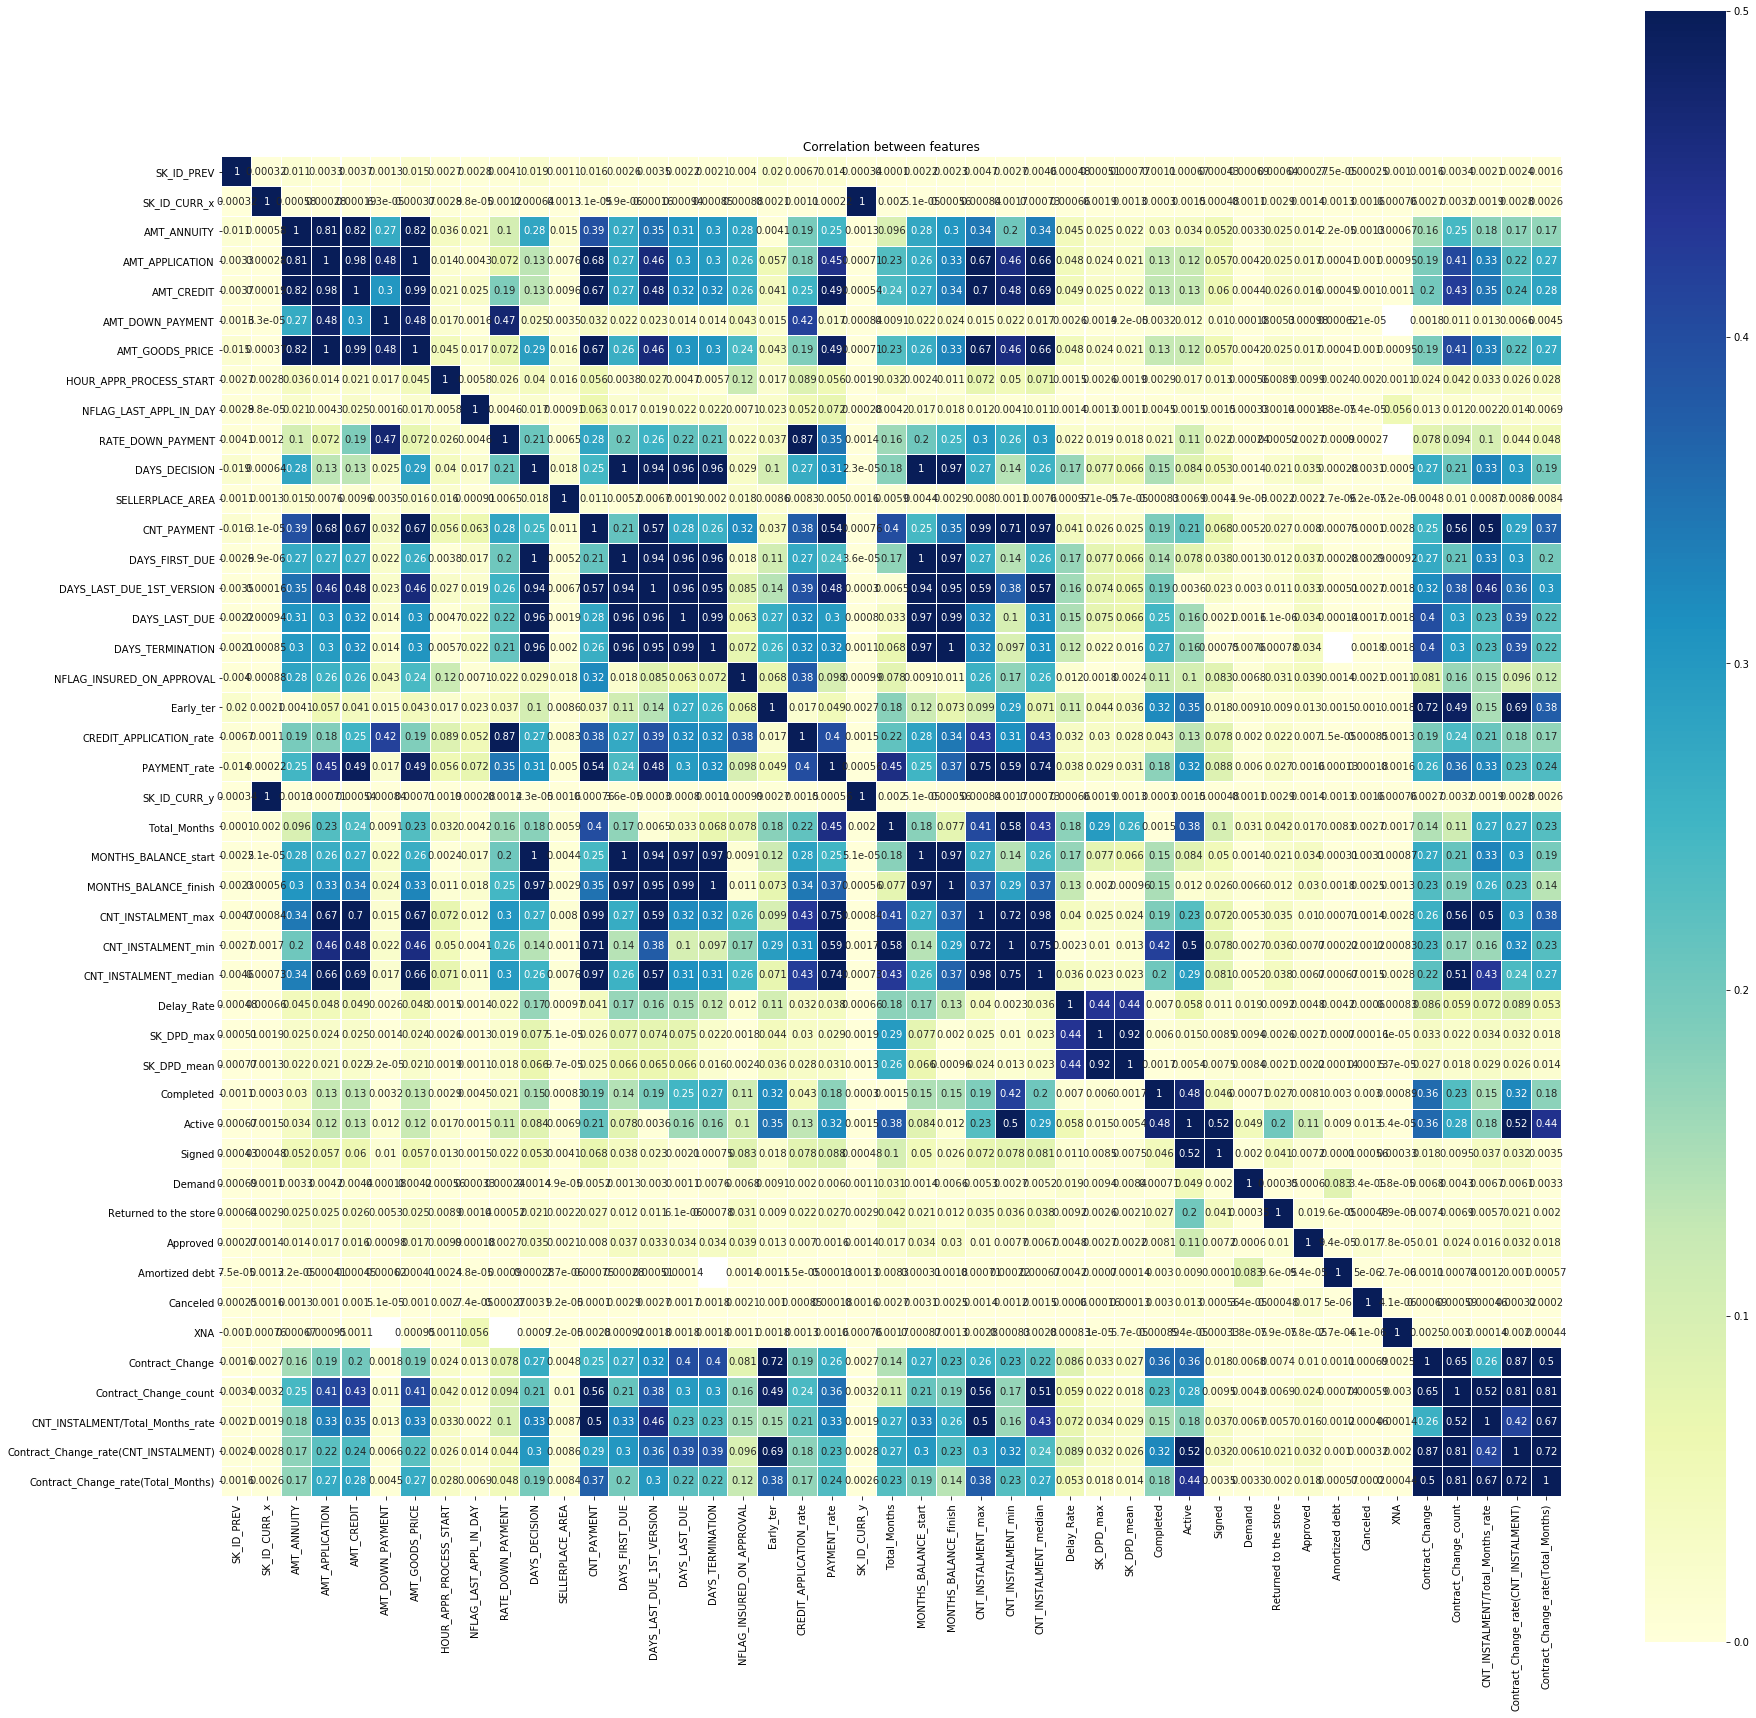

In [27]:
ext_data = result
correlations = ext_data.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(np.abs(correlations), vmin=0, vmax=0.5, linewidths=0.05,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')